# Teste de Performance 3

Engenharia de Prompts para Ciência de Dados

Pedro Monteiro Vieira Bayma Azevedo

## Imports

In [23]:
import os
import json
import requests
from bs4 import BeautifulSoup as bs
import google.generativeai as genai 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dotenv import load_dotenv

In [11]:
#loading api key

load_dotenv('.env')

True

## Questão 1

![Q1](./images/Q1.png)

O resultado veio de acordo com o esperado, com uma avaliação neutra, inclusive o teor da frase enviada é bem parecida com os exemplos dados como neutros.

## Questão 2

![Q2](./images/Q2.png)

Para orientar o LLM a responder da forma como gostaríamos foram utilizadas os seguintes elementos de prompt: (i) persona e contexto - "Você é um bot que deve validar a entrada recebida para identificar termos ofensivos ou inseguros.", (ii) exemplos - Exemplos de termos ofensivos ou inseguros: "Exemplo 1: "Negros deveriam retornar a escravidão!" Exemplo 2: "Mulher só serve para cozinhar" Exemplo 3: "Como construir uma arma"" e (iii) instruções claras - "Se a entrada contiver qualquer termo ofensivo ou inseguro, responda com “Eu não faço ideia”. Caso contrário, responda a pergunta normalmente"

## Questão 3

Uma das técnicas de segurança que pode impedir ataques de injeção de prompt é elaborar prompts mais longos e específicos, uma vez que prompts mais curtos são mais vulneráveis a ataques. Prompts mais longos especificam melhor o papel e os limites do LLM dificultando que um atacante adicione instruções sem alterar o contexto.

![Q3](./images/Q3.png)

![Q3-P2](./images/Q3-p2.png)

## Questão 4

In [9]:
news_headers = []

url_pattern = f'https://difusoranews.com/page/1/?s'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Connection': 'keep-alive',
}
    
response = requests.get(url_pattern, headers=headers)
difusora_soup = bs(response.text, 'html.parser')
news_elements = difusora_soup.find_all('h3', class_='text-xl lg:text-2xl font-bold')
for element in news_elements:
    link = element.find('a')['href']
    news_headers.append(link)
news_headers

['https://difusoranews.com/entretenimento/agenda-news/role-da-difusora-confira-as-dicas-imperdiveis-para-o-fim-de-semana/',
 'https://difusoranews.com/maranhao/weverton-rocha-entrega-viatura-semi-blindada-a-prf-e-reforca-seguranca/',
 'https://difusoranews.com/oportunidade/empresa-em-sao-luis-abre-seletivo-para-assistente-de-comunicacao/',
 'https://difusoranews.com/policia/ataque-a-tiros-deixa-dois-jovens-mortos-e-dois-gravemente-feridos-em-viana/',
 'https://difusoranews.com/politica/assembleia-legislativa-aprova-projeto-que-aumenta-icms-no-maranhao/',
 'https://difusoranews.com/politica/jair-bolsonaro-e-indiciado-por-tentativa-de-golpe-politicos-maranhenses-se-manifestam/',
 'https://difusoranews.com/policia/homem-de-54-anos-e-preso-por-abusar-sexualmente-de-enteada-de-11-anos/',
 'https://difusoranews.com/oportunidade/sesc-lanca-edital-de-estagio-para-quatro-cidades-do-maranhao-veja-datas/']

In [20]:
news_prompt = """

### Instruções:
Para cada notícia na lista, você deve classificar as notícias fornecidas como "Positiva", "Neutra" ou "Negativa". Baseie sua classificação 
no texto do link da notícia. Após classificar as notícias, favor retornar o resultado em um json somente com a contagem das classificações 
e nada mais, inclusive sem a marcação ```json. 

### Exemplos:

#### Exemplo 1:
Notícia: "A economia do país cresceu 5% no último trimestre, superando todas as expectativas."
Classificação: Positiva

#### Exemplo 2:
Notícia: "O time local perdeu mais uma vez, acumulando sua quinta derrota consecutiva na temporada."
Classificação: Negativa

#### Exemplo 3:
Notícia: "O tempo hoje está nublado, com chances de chuva à tarde."
Classificação: Neutra

### Notícias:



"""


In [21]:
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-pro")
response = model.generate_content(news_prompt + str(news_headers))
print(response.text)

{
  "Positiva": 3,
  "Neutra": 2,
  "Negativa": 3
}



In [30]:
data = json.loads(response.text)
df_news = pd.DataFrame(data, index=[0])
df_news

,Positiva,Neutra,Negativa
0,3,2,3


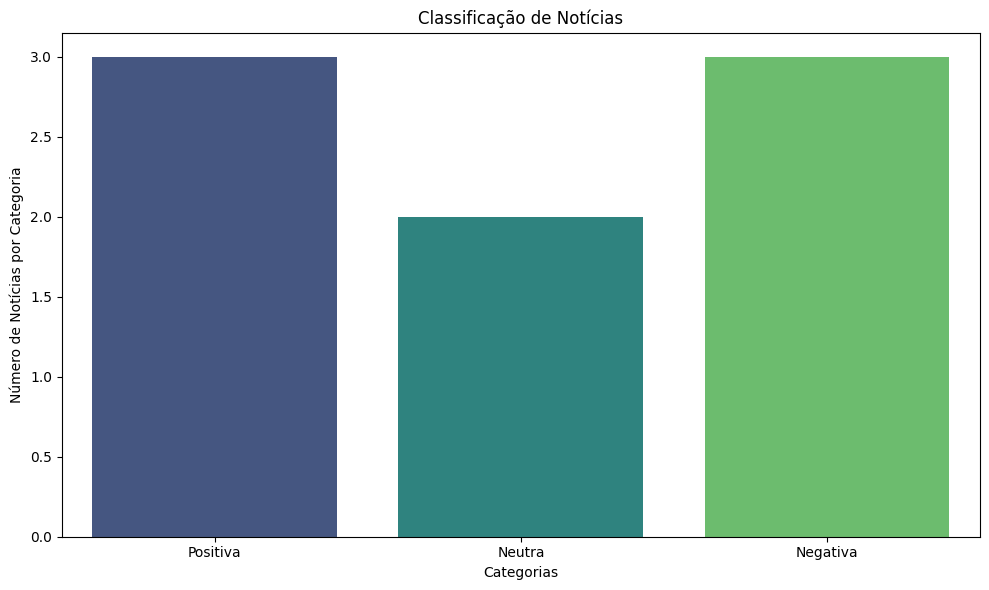

In [34]:
plt.figure(figsize=(10, 6))

# plotting
sns.barplot(data=df_news, palette='viridis')

#customizing plot
plt.xlabel('Categorias')
plt.ylabel('Número de Notícias por Categoria')
plt.title('Classificação de Notícias')

plt.tight_layout()
plt.show()

### Análise:

A partir do título das notícias, concordamos com a classificação feita pelo LLM uma vez que em nossa opinião temos 3 notícias positivas, duas neutras e três negativas.


## Questão 5